# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import itertools
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

Let's generate our dataset and take a look on it.

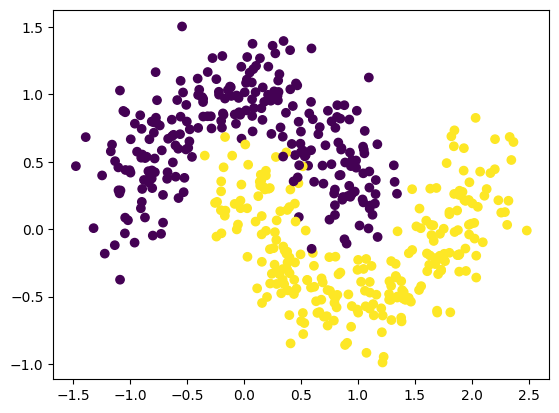

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.33, random_state=42)

lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
svm = svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Linear regression acc: ', accuracy_score(y_test, y_pred_lr))
print('SVM acc: ', accuracy_score(y_test, y_pred_svm))

Linear regression acc:  0.8727272727272727
SVM acc:  0.8727272727272727


0.86
0.86


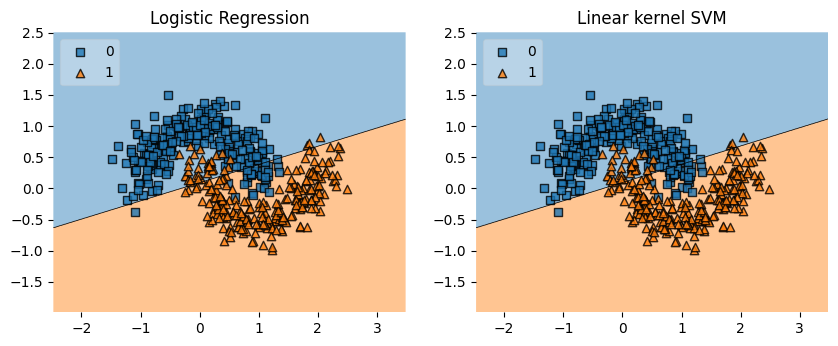

In [11]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Linear kernel SVM']

for clf, lab, grd in zip([lr, svm],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    print(clf.fit(X_train, y_train).score(moons_points, moons_labels))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X= moons_points, y= moons_labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

Мы посчитали метрики для линейных классификаторов на отложенных данных и на всем сете, а также построили графики с выделением цветом разделяющих плоскостей.

При линейном ядре SVM работает так же, как и логистическая регрессия (и по метрикам и визуально не отличаются)

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [7]:
### YOUR CODE HERE
from sklearn.svm import SVC

svm_rbf = SVC(C=1.0, kernel='rbf', gamma='scale', coef0=0.0)
svm_poly = SVC(C=1.0, kernel='poly', degree=3, gamma='scale', coef0=0.0)
svm_sigmoid = SVC(C=1.0, kernel='sigmoid', gamma='scale', coef0=0.0)

svm_rbf = svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print('SVM rbf acc: ', accuracy_score(y_test, y_pred_rbf))

svm_poly = svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print('SVM poly acc: ', accuracy_score(y_test, y_pred_poly))

svm_sigmoid = svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
print('SVM sigmoid acc: ', accuracy_score(y_test, y_pred_sigmoid))

SVM rbf acc:  0.9757575757575757
SVM poly acc:  0.9151515151515152
SVM sigmoid acc:  0.593939393939394


Попробовала три типа нелинейных ядер для SVM классификатора, подбирая степень для svm_poly. Наиболее качественная классификация получается при степени = 3, так как на графике видно, что кривая с 2 экстремумами лучше всего описывают разделяющую поверхность. Олнако на отложенных данных видно, что лучше всего с нелинейной задачей справляется svm_rbf

Score Polynomial 0.906
Score RBF 0.974
Score Sigmoid 0.648


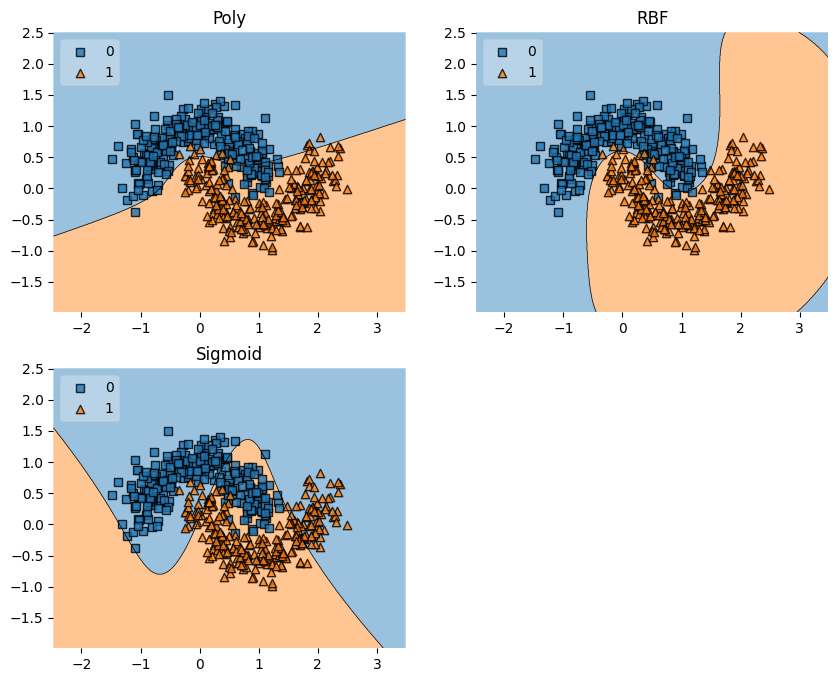

In [8]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

print('Score Polynomial {}'.\
      format(svm_poly.fit(moons_points, moons_labels).\
            score(moons_points, moons_labels)))
print('Score RBF {}'.\
      format(svm_rbf.fit(moons_points, moons_labels).\
             score(moons_points, moons_labels)))
print('Score Sigmoid {}'.\
      format(svm_sigmoid.fit(moons_points, moons_labels).\
             score(moons_points, moons_labels)))

labels = ['Poly',
          'RBF',
          'Sigmoid']

for clf, lab, grd in zip([svm_poly, svm_rbf, svm_sigmoid],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=moons_points, y=moons_labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

На графиках можно оценить, какое ядро лучше всего отвечает особенносям данных: сигмоида слишком изогнутая, poly наоборот - недостаточно изогнутая, а RBF ложится идеально

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### YOUR CODE HERE
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = lr.fit(X_train_poly, y_train)
y_pred_lr_ploy = lr_poly.predict(X_test_poly)
print('Linear regression acc: ', accuracy_score(y_test, y_pred_lr_ploy))


Linear regression acc:  0.9575757575757575


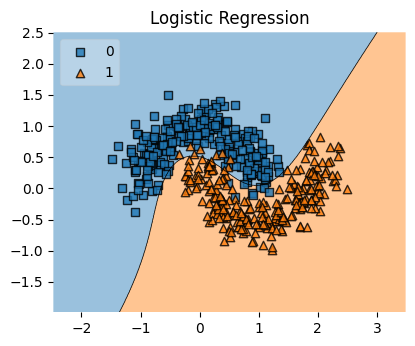

In [17]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression']
pipe = make_pipeline(PolynomialFeatures(degree = 3),LogisticRegression(random_state=42))
for clf, lab, grd in zip([pipe],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X= moons_points, y= moons_labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


Прокачала логистическую регрессию, добавляя нелинейные фичи. Так как степень полинома, которая нам нужна (и в выборе ядер SVM показала лучшие результаты) = 3, то передадим в PolynomialFeatures параметр degree = 3. Результат на отложенных данных высокий, но немного уступает RBF

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

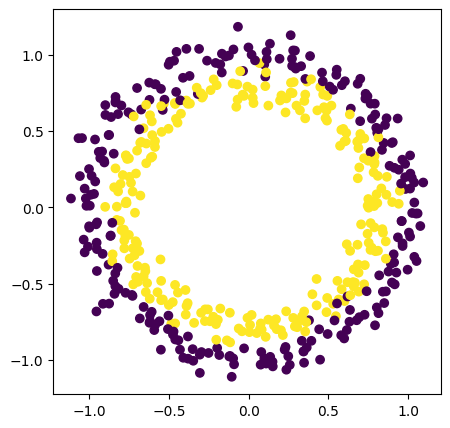

In [18]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

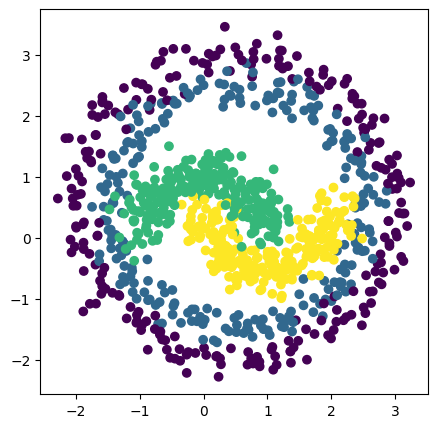

In [19]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [20]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.33, random_state=42)

poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LogisticRegression()
lr_poly = lr.fit(X_train_poly, y_train)
y_pred_lr_ploy = lr_poly.predict(X_test_poly)
print('Linear regression acc: ', accuracy_score(y_test, y_pred_lr_ploy))

svm_rbf = SVC(C=1.0, kernel='rbf', gamma='scale', coef0=0.0)
svm_poly = SVC(C=1.0, kernel='poly', degree=4, gamma='scale', coef0=0.0)
svm_sigmoid = SVC(C=1.0, kernel='sigmoid', gamma='scale', coef0=0.0)

svm_rbf = svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print('SVM rbf acc: ', accuracy_score(y_test, y_pred_rbf))

svm_poly = svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print('SVM poly acc: ', accuracy_score(y_test, y_pred_poly))

svm_sigmoid = svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
print('SVM sigmoid acc: ', accuracy_score(y_test, y_pred_sigmoid))




Linear regression acc:  0.9333333333333333
SVM rbf acc:  0.9151515151515152
SVM poly acc:  0.6454545454545455
SVM sigmoid acc:  0.08181818181818182


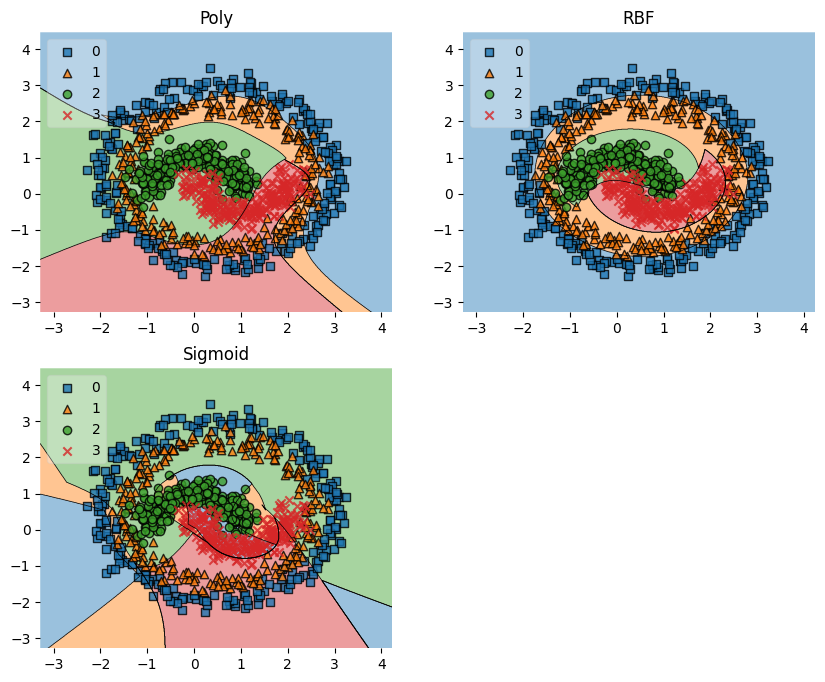

In [24]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([svm_poly, svm_rbf, svm_sigmoid],
                         ['Poly','RBF', 'Sigmoid'],
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()


Score Polynomial 0.942


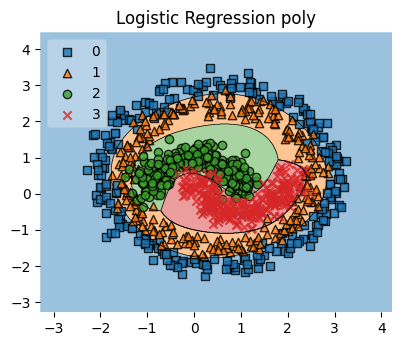

In [26]:
pipe = make_pipeline(PolynomialFeatures(degree = 4),LogisticRegression(random_state=0))

print('Score Polynomial {}'.\
      format(pipe.fit(points, labels).\
             score(points, labels)))

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([pipe], \
                         ['Logistic Regression poly'],\
                            itertools.product([0, 1],repeat=2)):
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=points, y=labels,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [23]:
poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LogisticRegression()
lr_poly = lr.fit(X_train_poly, y_train)
y_pred_lr_ploy = lr_poly.predict(X_test_poly)
print('Linear regression acc: ', accuracy_score(y_test, y_pred_lr_ploy))

svm_rbf = SVC(C=1.0, kernel='rbf', gamma='scale', coef0=0.0)
svm_poly = SVC(C=1.0, kernel='poly', degree=5, gamma='scale', coef0=0.0)
svm_sigmoid = SVC(C=1.0, kernel='sigmoid', gamma='scale', coef0=0.0)

svm_rbf = svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print('SVM rbf acc: ', accuracy_score(y_test, y_pred_rbf))

svm_poly = svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print('SVM poly acc: ', accuracy_score(y_test, y_pred_poly))

svm_sigmoid = svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
print('SVM sigmoid acc: ', accuracy_score(y_test, y_pred_sigmoid))

Linear regression acc:  0.896969696969697
SVM rbf acc:  0.9151515151515152
SVM poly acc:  0.5666666666666667
SVM sigmoid acc:  0.08181818181818182


Для усложненной задачи неплохо справляются все те же прокачанные варианты классифкаторов SVM c ядром RBF и логистическая регрессия со степенными фичами: 91% и 93% acc на отложенных данных соответсвенно.

Важно, что степень для признаков уже другая, равна 4. Я проверила также 5 и 3, дают результаты хуже.


В данной части лабораторной работы мы попробовали работать с линейно неразделимыми данными. В этом случае нам нужно либо отрисовывать данные, чтобы подобрать число степени нелинейности для использования логистической регрессии, либо выбирать SVM c ядром RBF как оптимальным вариант без параметра, который хорошо работает с нелинейностью в общем случае.